In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv("./data_train_frequency_merge.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,Rhythm,Rcount_lead1,RRInterval_mean_lead1,RRInterval_median_lead1,RRInterval_std_lead1,RRInterval_range_lead1,RRInterval_skew_lead1,RRInterval_kurtosis_lead1,R_peaks_amplitude_from_isoelectric_mean_lead1,PRovercount_lead1,...,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,1,8.0,1080.857143,1086.0,21.879074,66.0,-0.622052,-0.821453,694.163664,1.000000,...,56,106,436,420,50,7,10,219,272,437
1,3,18.0,535.764706,536.0,1.351662,4.0,0.146383,-0.825069,149.028032,1.000000,...,112,70,354,483,56,45,18,229,264,406
2,1,7.0,1344.333333,1581.0,402.603886,974.0,-0.717501,-1.392992,302.224787,0.857143,...,0,92,426,368,51,70,7,216,262,429
3,3,17.0,561.500000,562.0,4.609772,16.0,-0.367506,-0.701176,804.877251,1.000000,...,107,88,338,451,-12,74,18,216,260,385
4,2,16.0,612.400000,612.0,4.963869,14.0,0.163258,-1.136195,451.559324,1.000000,...,98,78,352,449,54,33,16,218,257,394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,3,17.0,559.750000,561.0,3.929058,16.0,-0.666167,0.137849,630.195529,1.000000,...,107,80,348,464,22,135,17,225,265,399
8512,1,8.0,1211.714286,1212.0,20.126133,60.0,0.117312,-1.249265,441.849082,1.000000,...,50,110,402,366,55,56,8,216,271,417
8513,2,12.0,789.272727,792.0,24.764678,96.0,-1.129683,0.997705,278.529342,1.000000,...,76,76,374,420,42,-4,12,219,257,406
8514,0,18.0,514.823529,490.0,115.746292,402.0,0.832975,-0.335017,92.402139,1.000000,...,129,72,274,415,86,-81,23,218,254,355


In [3]:
x_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [4]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [5]:
df_test = pd.read_csv("./data_test_frequency_merge.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,Rhythm,Rcount_lead1,RRInterval_mean_lead1,RRInterval_median_lead1,RRInterval_std_lead1,RRInterval_range_lead1,RRInterval_skew_lead1,RRInterval_kurtosis_lead1,R_peaks_amplitude_from_isoelectric_mean_lead1,PRovercount_lead1,...,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,2,12.0,806.545455,742.0,139.662166,498.0,1.930425,2.666314,72.781980,1.000000,...,73,80,370,407,88,58,12,220,260,405
1,3,17.0,570.000000,570.0,3.316625,12.0,0.246691,-0.553719,196.378284,1.000000,...,105,98,368,486,75,52,17,214,263,398
2,1,9.0,1159.500000,1156.0,30.995967,80.0,0.143027,-1.646515,131.265115,1.000000,...,52,158,492,457,203,-2,9,226,305,472
3,3,21.0,460.900000,370.0,197.475543,740.0,2.060318,3.244488,92.225535,0.857143,...,163,138,270,444,97,262,27,207,276,342
4,3,18.0,555.882353,556.0,8.525963,28.0,-0.187149,-1.101203,187.851047,1.000000,...,108,76,346,463,18,50,18,216,254,389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1,9.0,1023.250000,1023.0,7.996093,24.0,-0.157885,-1.293608,872.646176,1.000000,...,59,102,464,459,25,15,10,215,266,447
2126,2,14.0,652.461538,646.0,31.183367,104.0,0.254349,-0.953411,344.958851,1.000000,...,92,88,356,440,65,48,15,222,266,400
2127,1,9.0,1124.000000,1135.0,33.075671,98.0,-0.221530,-1.372342,467.241572,1.000000,...,53,84,418,392,24,22,9,220,262,429
2128,1,8.0,1144.000000,1148.0,20.674346,66.0,-0.481105,-0.769574,123.061280,1.000000,...,52,100,422,392,83,70,8,215,265,426


In [6]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [7]:
x_test = scale.transform(x_test)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4258, 225)
Vallidation: (4258, 225)


In [9]:
# Khởi tạo các mô hình con
# rf_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 5, max_features= 'sqrt', n_estimators= 100)
# ab_clf = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 1000)
# knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, p= 1, weights= 'uniform')
# svc_clf = SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability= True)
# xgb_clf = XGBClassifier(gamma= 0.1,learning_rate= 0.1,max_depth= 3,min_child_weight= 1,n_estimators= 1000)
# dt_clf = DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'sqrt',splitter= 'best')

rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 20, max_features= 'sqrt', n_estimators= 50)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 0.1, n_estimators= 60)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 12, p= 1, weights= 'uniform')
svc_clf = SVC(C= 14, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.05,max_depth= 5,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'gini',max_depth= 6,max_features= 'sqrt',splitter= 'best')
# lr_clf = LogisticRegression(C= 0.15, max_iter= 10, multi_class= 'auto', n_jobs= -1, penalty= 'l2', solver= 'sag', tol= 0.01)

In [10]:
# Huấn luyện các mô hình con
rf_clf.fit(x_train,y_train)
ab_clf.fit(x_train, y_train)
knn_clf.fit(x_train, y_train)
svc_clf.fit(x_train, y_train)
xgb_clf.fit(x_train, y_train)
dt_clf.fit(x_train,y_train)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


DecisionTreeClassifier(max_depth=6, max_features='sqrt')

In [11]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    rf_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    knn_clf.predict_proba(x_val),
    svc_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    dt_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    knn_clf.predict_proba(x_test),
    svc_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    dt_clf.predict_proba(x_test)
))

In [ ]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
params = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(0.001,0.01,10),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [1,2,3,4],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs':[-1],
    'tol':[0.0001,0.001,0.01]
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

In [13]:
result_test = grid_model.predict(X_test_meta)

In [14]:
grid_model.best_params_

{'C': 0.007,
 'max_iter': 1,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l1',
 'solver': 'saga',
 'tol': 0.0001}

In [15]:
grid_model.best_score_

0.963595833870973

In [16]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

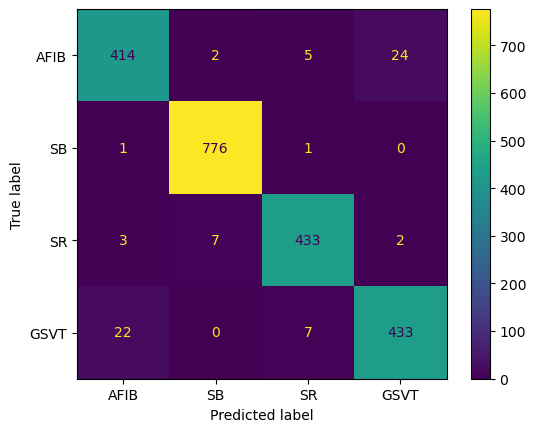

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.973239,0.930337,0.940909,0.935593,0.984570
1,SB,0.994836,0.997429,0.988535,0.992962,0.993343
2,SR,0.988263,0.973034,0.970852,0.971942,0.992285
3,GSVT,0.974178,0.937229,0.943355,0.940282,0.984412
4,macro avg,NaN,0.960195,0.960913,0.959507,NaN
5,micro avg,NaN,0.965258,0.965258,0.965258,NaN
6,weighted avg,NaN,0.965159,0.965091,0.965258,NaN


In [17]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [18]:
df_evaluation_test.to_csv("./Result/Blending_LR.csv")